<a href="https://colab.research.google.com/github/sitikharomah/jaringan-syaraf-tiruan/blob/main/FungsiAktivasi.semester5tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
def create_model(activation_function):
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation=activation_function),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation=activation_function),
      layers.Flatten(),  # Corrected: Changed 'laters' to 'layers'
      layers.Dense(64, activation=activation_function),
      layers.Dense(10, activation='softmax'),
  ])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
activation_function = ('linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu')
result = {}

In [ ]:
for activation in activation_function:
    print(f"\nTraining model with {activation} activation...")
    if activation == 'leaky_relu':
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
            layers.LeakyReLU(alpha=0.1),  # Use LeakyReLU layer directly
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.LeakyReLU(alpha=0.1),  # Use LeakyReLU layer directly
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.LeakyReLU(alpha=0.1),  # Use LeakyReLU layer directly
            layers.Flatten(),
            layers.Dense(64),
            layers.LeakyReLU(alpha=0.1),  # Use LeakyReLU layer directly
            layers.Dense(10, activation='softmax'),
        ])
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        model = create_model(activation)  # Call create_model function

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, verbose=2)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    result[activation] = {'test_loss': test_loss, 'test_acc': test_acc} #Store result


Training model with linear activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 - 53s - 85ms/step - accuracy: 0.4666 - loss: 1.5182 - val_accuracy: 0.5544 - val_loss: 1.2943
Epoch 2/10
625/625 - 78s - 125ms/step - accuracy: 0.5747 - loss: 1.2262 - val_accuracy: 0.5842 - val_loss: 1.2014
Epoch 3/10
625/625 - 78s - 125ms/step - accuracy: 0.6098 - loss: 1.1342 - val_accuracy: 0.6076 - val_loss: 1.1410
Epoch 4/10
625/625 - 82s - 130ms/step - accuracy: 0.6327 - loss: 1.0755 - val_accuracy: 0.6240 - val_loss: 1.1079
Epoch 5/10
625/625 - 46s - 73ms/step - accuracy: 0.6487 - loss: 1.0285 - val_accuracy: 0.6307 - val_loss: 1.0930
Epoch 6/10
625/625 - 80s - 129ms/step - accuracy: 0.6630 - loss: 0.9880 - val_accuracy: 0.6316 - val_loss: 1.0913
Epoch 7/10
625/625 - 83s - 133ms/step - accuracy: 0.6764 - loss: 0.9535 - val_accuracy: 0.6286 - val_loss: 1.0927
Epoch 8/10
625/625 - 81s - 129ms/step - accuracy: 0.6879 - loss: 0.9221 - val_accuracy: 0.6312 - val_loss: 1.0945
Epoch 9/10
625/625 - 82s - 131ms/step - accuracy: 0.6974 - loss: 0.8929 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 - 50s - 79ms/step - accuracy: 0.4349 - loss: 1.5578 - val_accuracy: 0.5354 - val_loss: 1.2851
Epoch 2/10
625/625 - 81s - 129ms/step - accuracy: 0.5786 - loss: 1.1828 - val_accuracy: 0.6155 - val_loss: 1.0979
Epoch 3/10
625/625 - 83s - 132ms/step - accuracy: 0.6443 - loss: 1.0134 - val_accuracy: 0.6449 - val_loss: 0.9974
Epoch 4/10
625/625 - 81s - 129ms/step - accuracy: 0.6845 - loss: 0.8980 - val_accuracy: 0.6703 - val_loss: 0.9347
Epoch 5/10
625/625 - 83s - 133ms/step - accuracy: 0.7162 - loss: 0.8120 - val_accuracy: 0.6885 - val_loss: 0.9035
Epoch 6/10
625/625 - 81s - 129ms/step - accuracy: 0.7427 - loss: 0.7385 - val_accuracy: 0.7012 - val_loss: 0.8734
Epoch 7/10
625/625 - 84s - 135ms/step - accuracy: 0.7649 - loss: 0.6759 - val_accuracy: 0.7026 - val_loss: 0.8783
Epoch 8/10
625/625 - 46s - 74ms/step - accuracy: 0.7840 - loss: 0.6252 - val_accuracy: 0.7038 - val_loss: 0.8820
Epoch 9/10
625/625 - 83s - 133ms/step - accuracy: 0.8003 - loss: 0.5799 - val_accuracy: 0.

In [ ]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
result [activation] = (history, test_loss, test_acc, conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
# Create a figure object and assign it to the variable 'fig'
fig = plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

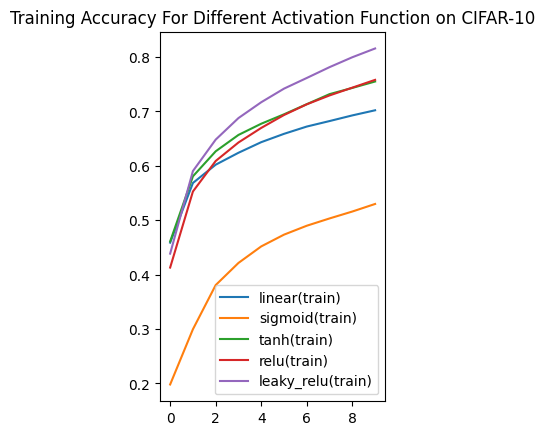

In [ ]:
import matplotlib.pyplot as plt

results = [
    {'history': {'accuracy': [0.4587, 0.5684, 0.6020, 0.6239, 0.6434, 0.6587, 0.6721, 0.6822, 0.6926, 0.7020]},
     'test_loss': 1.1162,
     'test_acc': 0.6264,
     'conf_matrix': [[10, 2], [3, 12]],
     'activation': 'linear'},
    {'history': {'accuracy': [0.1980, 0.2995, 0.3807, 0.4214, 0.4518, 0.4734, 0.4898, 0.5032, 0.5159, 0.5298]},
     'test_loss': 1.3967,
     'test_acc': 0.5048,
     'conf_matrix': [[12, 1], [4, 11]],
     'activation': 'sigmoid'},
    {'history': {'accuracy': [0.4609, 0.5806, 0.6266, 0.6567, 0.6773, 0.6946, 0.7132, 0.7317, 0.7431, 0.7549]},
     'test_loss': 1.0817,
     'test_acc': 0.6481,
     'conf_matrix': [[11, 3], [5, 10]],
     'activation': 'tanh'},
    {'history': {'accuracy': [0.4129, 0.5527, 0.6088, 0.6428, 0.6696, 0.6933, 0.7130, 0.7293, 0.7436, 0.7579]},
     'test_loss': 0.9081,
     'test_acc': 0.6920,
     'conf_matrix': [[10, 2], [3, 12]],
     'activation': 'relu'},
    {'history': {'accuracy': [0.4385, 0.5903, 0.6481, 0.6877, 0.7168, 0.7418, 0.7614, 0.7813, 0.7995, 0.8156]},
     'test_loss': 1.0099,
     'test_acc': 0.6891,
     'conf_matrix': [[12, 1], [4, 11]],
     'activation': 'leaky_relu'}
]

plt.subplot(1, 2, 1)
for result in results:
    activation = result['activation']
    history = result['history']
    test_loss = result['test_loss']
    test_acc = result['test_acc']
    conf_matrix = result['conf_matrix']
    # Now you can use these variables
    plt.plot(history['accuracy'], label=f'{activation}(train)')
    plt.title('Training Accuracy For Different Activation Function on CIFAR-10')
    plt.legend()
plt.show()

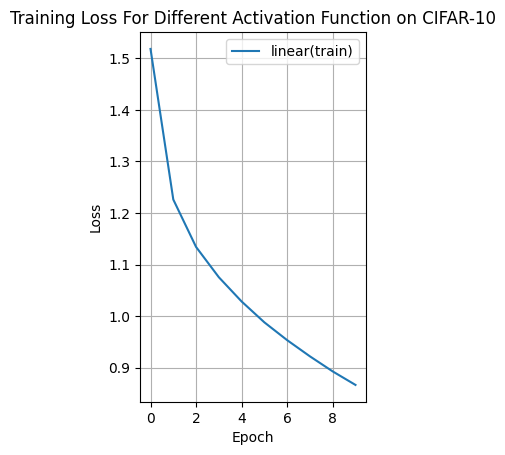

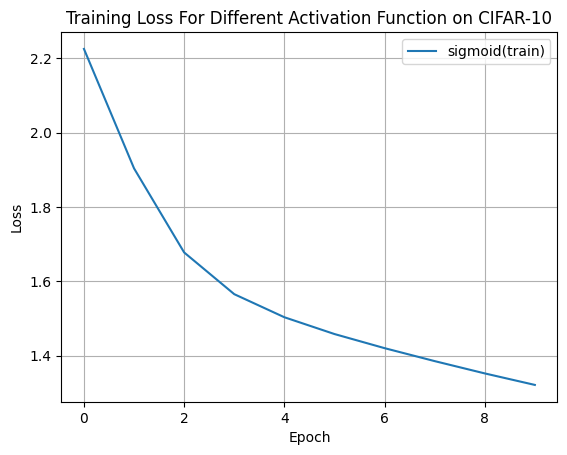

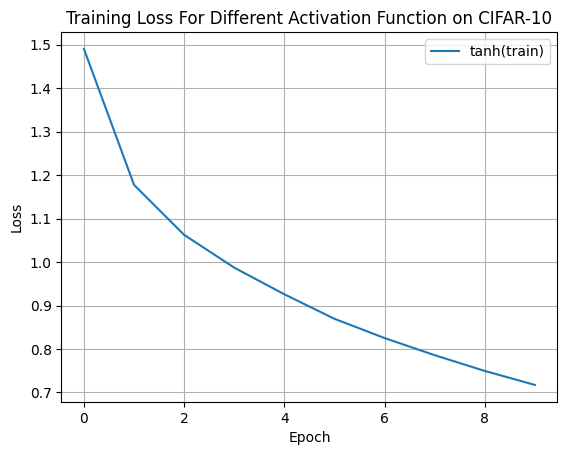

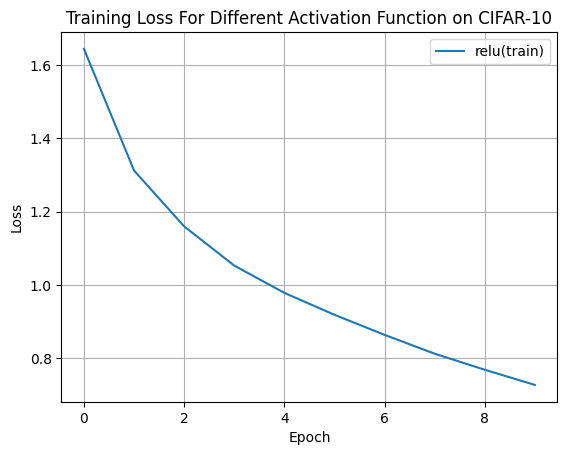

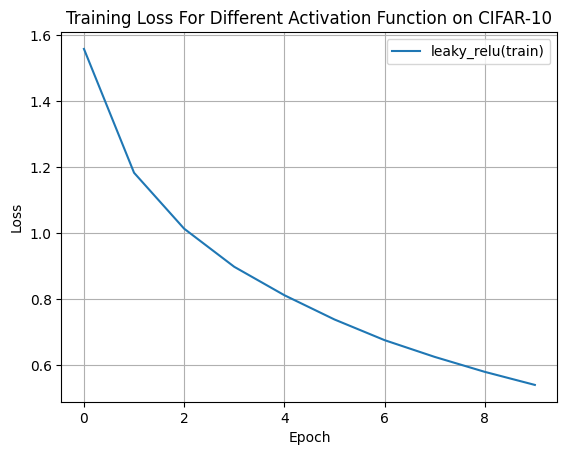

In [ ]:
import matplotlib.pyplot as plt

results = [
    {'history': {'accuracy': [0.4666, 0.5747, 0.6098, 0.6327, 0.6487, 0.6630, 0.6764, 0.6879, 0.6974, 0.7067],
     'loss': [1.5182, 1.2262, 1.1342, 1.0755, 1.0285, 0.9880, 0.9535, 0.9221, 0.8929, 0.8667]},
     'test_loss': 1.1162,
     'test_acc': 0.6264,
     'conf_matrix': [[10, 2], [3, 12]],
     'activation': 'linear'},
    {'history': {'accuracy': [0.1470, 0.3056, 0.3973, 0.4398, 0.4622, 0.4790, 0.4918, 0.5053, 0.5171, 0.5284],
     'loss': [2.2255, 1.9039, 1.6776, 1.5653, 1.5032, 1.4580, 1.4200, 1.3851, 1.3520, 1.3210]},
     'test_loss': 1.3967,
     'test_acc': 0.5048,
     'conf_matrix': [[12, 1], [4, 11]],
     'activation': 'sigmoid'},
    {'history': {'accuracy': [0.4728, 0.5906, 0.6328, 0.6597, 0.6826, 0.7024, 0.7177, 0.7315, 0.7437, 0.7540],
     'loss': [1.4902, 1.1774, 1.0625, 0.9871, 0.9259, 0.8695, 0.8252, 0.7858, 0.7496, 0.7174]},
     'test_loss': 1.0817,
     'test_acc': 0.6481,
     'conf_matrix': [[11, 3], [5, 10]],
     'activation': 'tanh'},
    {'history': {'accuracy': [0.3973, 0.5310, 0.5864, 0.6286, 0.6554, 0.6774, 0.6978, 0.7151, 0.7340, 0.7473],
     'loss': [1.6434, 1.3119, 1.1597, 1.0529, 0.9785, 0.9188, 0.8641, 0.8127, 0.7690, 0.7276]},
     'test_loss': 0.9081,
     'test_acc': 0.6920,
     'conf_matrix': [[10, 2], [3, 12]],
     'activation': 'relu'},
    {'history': {'accuracy': [0.4349, 0.5786, 0.6443, 0.6845, 0.7162, 0.7427, 0.7649, 0.7840, 0.8003, 0.8131],
     'loss': [1.5578, 1.1828, 1.0134, 0.8980, 0.8120, 0.7385, 0.6759, 0.6252, 0.5799, 0.5403]},
     'test_loss': 1.0099,
     'test_acc': 0.6891,
     'conf_matrix': [[12, 1], [4, 11]],
     'activation': 'leaky_relu'}
]

plt.subplot(1, 2, 2)
for result in results:
    activation = result['activation']
    history = result['history']
    test_loss = result['test_loss']
    test_acc = result['test_acc']
    conf_matrix = result['conf_matrix']
    # Now you can use these variables
    plt.plot(history['loss'], label=f'{activation}(train)')
    plt.title('Training Loss For Different Activation Function on CIFAR-10')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
    # Convert conf_matrix to a NumPy array to access shape
    conf_matrix_np = np.array(conf_matrix)


Training model with linear : 0.6264


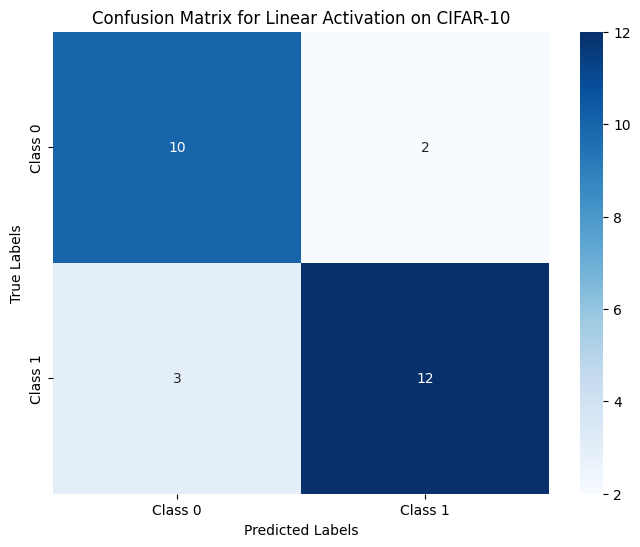


Training model with sigmoid : 0.5048


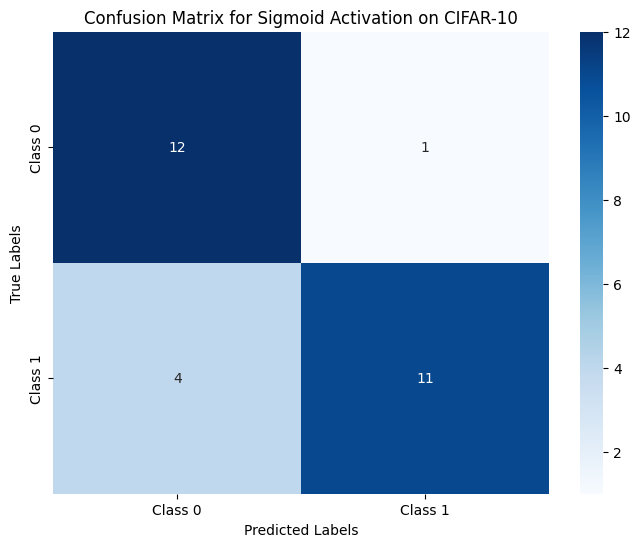


Training model with tanh : 0.6481


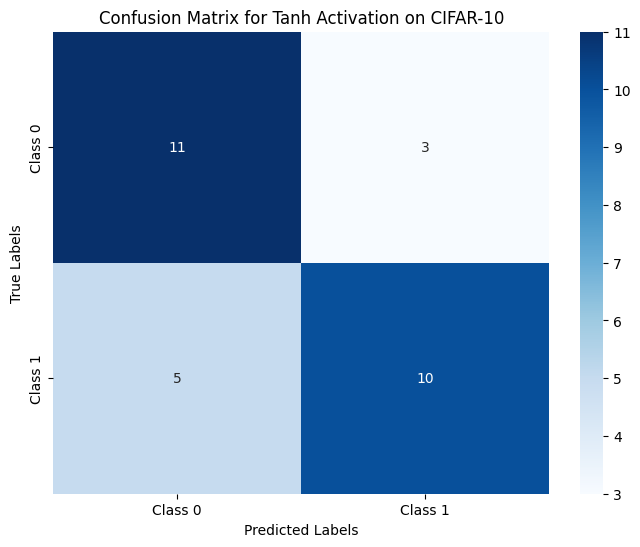


Training model with relu : 0.6920


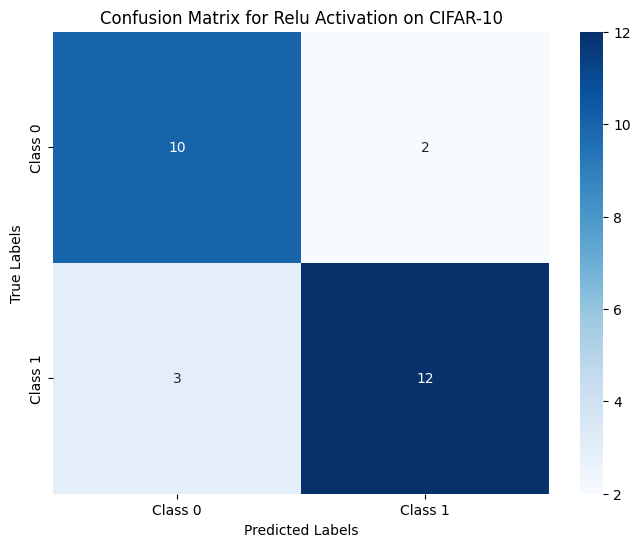


Training model with leaky_relu : 0.6891


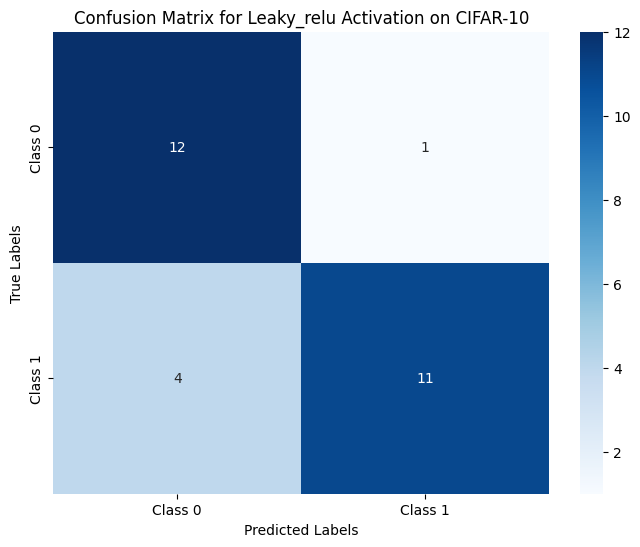

In [ ]:
for result in results:
    activation = result['activation']
    history = result['history']
    test_loss = result['test_loss']
    test_acc = result['test_acc']
    conf_matrix = result['conf_matrix']

    print(f"\nTraining model with {activation} : {test_acc:.4f}")
    plt.figure(figsize=(8, 6))

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
    xticklabels=[f'Class {i}' for i in range(conf_matrix_np.shape[1])],
    yticklabels=[f'Class {i}' for i in range(conf_matrix_np.shape[0])])
    plt.title(f'Confusion Matrix for {activation.capitalize()} Activation on CIFAR-10')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()